In [41]:
import os
import numpy as np
import random as rn

SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt

keras.__version__

'2.3.0'

In [42]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [43]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [44]:
type(x_train), type(y_train), type(x_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

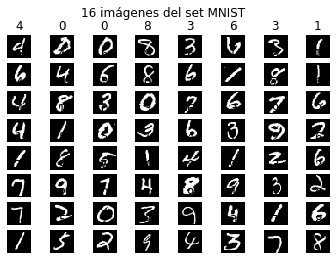

In [45]:
# Visualizaremos 16 imágenes aleatorias tomadas del set x_train
ids_imgs = np.random.randint(0, x_train.shape[0], 64)

for i in range(len(ids_imgs)):
    img = x_train[ids_imgs[i],:,:]
    plt.subplot(8, 8, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[ids_imgs[i]]))
    
plt.suptitle('16 imágenes del set MNIST')
plt.show()

In [46]:
X_train = np.reshape(
    x_train, 
    (x_train.shape[0],x_train.shape[1]*x_train.shape[2])
)
X_test = np.reshape(
    x_test, 
    (x_test.shape[0],x_test.shape[1]*x_test.shape[2])
)

In [47]:
X_train.shape

(60000, 784)

In [48]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [49]:
# Adicionalmente se normalizarán las intensidades al rango 0-1
X_train = X_train/255.0
X_test = X_test/255.0

In [50]:
# Finalmente, convertimos y_train y y_test a representación "one-hot"
nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

In [51]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [52]:
# Creación del modelo:
# - Capa de entrada: su dimensión será 784 (el tamaño de cada imagen aplanada)
# - Capa oculta: 15 neuronas con activación ReLU
# - Capa de salida: función de activación 'softmax' (clasificación multiclase) y un
#     total de 10 categorías
#
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

input_dim, output_dim

(784, 10)

In [53]:
modelo = Sequential()
modelo.add( 
    Dense(15, input_dim=input_dim, activation='relu')
)
modelo.add(
    Dense(output_dim, activation='softmax')
)
print(modelo.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
sgd = SGD(lr=0.2)

modelo.compile(
    loss='categorical_crossentropy', 
    optimizer=sgd, 
    metrics=['accuracy']
)

In [60]:
# Para el entrenamiento se usarán 30 iteraciones y un batch_size de 1024
num_epochs = 12
batch_size = 32

historia = modelo.fit(
    X_train, Y_train, 
    epochs=num_epochs, 
    batch_size=batch_size, 
    verbose=2,
    validation_split=0.1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/12
 - 3s - loss: 0.0910 - accuracy: 0.9720 - val_loss: 0.2070 - val_accuracy: 0.9560
Epoch 2/12
 - 3s - loss: 0.0909 - accuracy: 0.9715 - val_loss: 0.2012 - val_accuracy: 0.9570
Epoch 3/12
 - 3s - loss: 0.0928 - accuracy: 0.9708 - val_loss: 0.2331 - val_accuracy: 0.9500
Epoch 4/12
 - 3s - loss: 0.0907 - accuracy: 0.9727 - val_loss: 0.2138 - val_accuracy: 0.9552
Epoch 5/12
 - 3s - loss: 0.0899 - accuracy: 0.9714 - val_loss: 0.2136 - val_accuracy: 0.9535
Epoch 6/12
 - 3s - loss: 0.0905 - accuracy: 0.9714 - val_loss: 0.2114 - val_accuracy: 0.9567
Epoch 7/12
 - 3s - loss: 0.0906 - accuracy: 0.9722 - val_loss: 0.2394 - val_accuracy: 0.9513
Epoch 8/12
 - 3s - loss: 0.0900 - accuracy: 0.9719 - val_loss: 0.2221 - val_accuracy: 0.9545
Epoch 9/12
 - 4s - loss: 0.0895 - accuracy: 0.9714 - val_loss: 0.2457 - val_accuracy: 0.9453
Epoch 10/12
 - 3s - loss: 0.0882 - accuracy: 0.9720 - val_loss: 0.2205 - val_accuracy: 0.9525
Epoch 11/12
 - 4s - 

In [56]:
historia.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

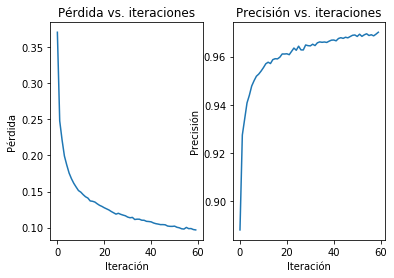

In [57]:
# Error y precisión vs iteraciones
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')

plt.show()

In [58]:
# Calcular la precisión sobre el set de validación
puntaje = modelo.evaluate(X_test, Y_test,verbose=1)
print('Precisión en el set de validación: {:.2f}%'.format(100*puntaje[1]))

10000/10000 [==============================] - 0s 36us/step
Precisión en el set de validación: 94.28%
